# Exercise 1: Model of a neuron and the learning process

## 1.1 Model of a neuron

Write a Python function, which calculates the output of a neuron. Assume a model of a neuron shown in Figure 1 with three inputs and a threshold. The threshold can be interpreted as an additional input with fixed input of $-1$ and weight $w_{10}$. The output of the function has to correspond to output of the neuron.

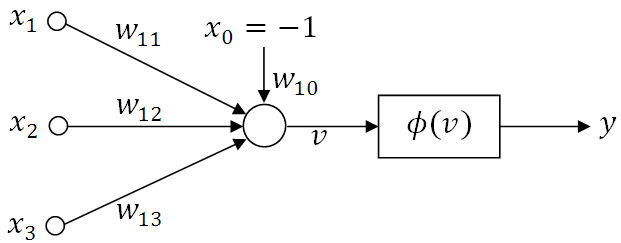

Figure 1. Model of a neuron

Use the scalar product of input vector $[x_0 x_1 x_2 x_3]$ and weights $[x_0 x_1 x_2 x_3]$ in order to calculate the neuron activation. The function has to have an additional input, which is used to select different nonlinear activation functions. The function should support the following nonlinear functions:

1. Step function
2. Piecewise linear function (ramp)
3. Sigmoid function defined as $\phi = \frac{1}{1+\exp (-av)}$, with $a=1$

**Tasks**

1. Write the code for calculating the aforementioned nonlinear functions and for the function which calculates the output of a neuron.

In [117]:
import numpy as np

def step_function(x):
    if x >= 0: return 1
    else: return 0

def ramp_function(x):
    if x >= 0: return x
    else: return 0

def sigmoid_function(x, a=1):
    return 1/(1+np.exp(-a*x))

def neuron(x, w, activation):
    adder = np.dot(x, w)
    activation_functions = {
        'step': step_function,
        'ramp': ramp_function,
        'sigmoid': sigmoid_function,
    }
    return activation_functions[activation](adder)

**Tasks**

1. Pick a random weight vector $\mathbf{w}$. Write down the chosen weights and print the neuron response for following inputs (for each activation function):

$x_1 = [0.5, 1, 0.7]^T$

$x_2 = [0, 0.8, 0.2]^T$


In [23]:
w = np.array([0.02, -0.13, 0.5, 0.27])
x1 = np.array([-1, 0.5, 1, 0.7])
x2 = np.array([-1, 0, 0.8, 0.2])

for x in [x1, x2]:
    print('Input: ' + str(x))
    for activation in ['step', 'ramp', 'sigmoid']:
        neuron_response = neuron(x, w, activation)
        print('Neuron response using ' + activation + ' function: ' + str(neuron_response))
    

Input: [-1.   0.5  1.   0.7]
Neuron response using step function: 1
Neuron response using ramp function: 0.604
Neuron response using sigmoid function: 0.6465709090974481
Input: [-1.   0.   0.8  0.2]
Neuron response using step function: 1
Neuron response using ramp function: 0.434
Neuron response using sigmoid function: 0.6068284258893842


## 1.2 Three neuron network

Write a function for a three neuron network (Figure 2) using the function developed in section 1.1.. Assume that neurons use the sigmoid transfer function, where $a=1$ and assume the weights are given as follows:

$w_1=[1, 0.5, 1, -0.4]$

$w_2=[0.5, 0.6, -1.5, -0.7]$

$w_3=[-0.5, -1.5, 0.6]$

*Remark*: The first element of the weight vector is the threshold of a neuron and is shown as $w_{i0}$ in Figure 2.

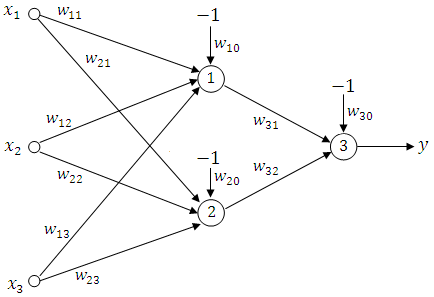

Figure 2. Three neuron network



**Tasks**

1. Write the code for calculating the output of the network shown in Fig. 2.

In [118]:
def three_neuron_network(x):
    w1 = np.array([1, 0.5, 1, -0.4])
    w2 = np.array([0.5, 0.6, -1.5, -0.7])
    w3 = np.array([-0.5, -1.5, -0.6])
    
    neuron1 = neuron(x, w1, 'sigmoid')
    neuron2 = neuron(x, w2, 'sigmoid')
    
    return neuron(np.array([-1, neuron1, neuron2]), w3, 'sigmoid')
    

**Tasks**

1. Print the output of the network for input given as $x=[0.3, 0.7, 0.9]^T$.
2. Does the output of the network depend on neuron weights?  
 
   Of course it depends. By changing the weights we are altering how much each input or internal output contributes to the final result.  
   This can be simply tested by changing w vectors in the previous cell.

In [119]:
x = np.array([-1, 0.3, 0.7, 0.9])
print(three_neuron_network(x))

0.4664723768983951


## 1.3 Delta rule

The goal of this experiment is to better understand the learning process. In this experiment we will implement a logical AND function using one neuron with two inputs and a threshold (see Figure 3). We will use the sigmoid nonlinear activation function with $a=1$.

For the learning phase, we have to define the following input output pairs $x_i$, $y_i$ for the logical AND function: for inputs $x_1=[-1, 0, 0]^T$, $x_2=[-1, 0, 1]^T$, and $x_3=[-1, 1, 0]^T$ the output $y$ should be equal to $0$; for input vector $x_4=[-1, 1, 1]^T$ the output value $y$ should be equal to $1$. The first component of all input vectors has value $-1$ and defines the neuron threshold visible as $w_{10}$ in Fig. 3. At the beginning we set the neuron weights to random values. We use the delta rule in order to update the weights:

$$\Delta w_{kj}=\eta e_{k}(n)x_{j}(n)$$

where

$$e_{k}(n)=d_{k}(n)-y_{k}(n)$$

where $d_{k}(n)$ is the expected neuron output and $y_{k}(n)$ is the obtained neuron output. This iterative procedure is repeated until the error is sufficiently small.

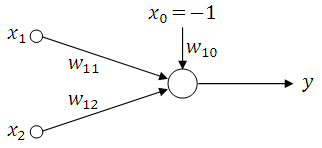

Figure 3. One neuron network

**Tasks**

1. Write the code which iteratively calculates the output of the network and uses the delta rule to update the weights until the error is sufficiently small. Experiment with different starting weights and different learning rates. (In case of instabilities, perform the experiment using a small learning rate, for example $\eta =0.05$). Show the error function ($y$-axis) and number of iterations ($x$-axis) for different learning rates.

    - What is the best learning rate? How does the learning rate affect the neural network?
        - The best learning rate is the one when NN converges more quickly, but also the one that provides the best outcome. In this case the best learning rate is 0.5 if we focus on the number of iterations and the smallest error. Learning rate affects the neural network in a way that it determines the step size at which the model updates the iteration weights. Bigger learning rates will have bigger steps so the NN can converge more quickly, but also it is possible that NN gets stuck in some of the local minimums and "step over" the global minimum that we need. Smaller learning rates can find more precise solution, but take more time. 
    - How did you define the sufficiently small error used to terminate the algorithm?
        - I just played with parameters in the "playground" section. I choose the terminate threshold error to be 0.0001 which is small and possible to achieve with the most of provided learning rates. In this case the smallest learning rate was terminated with max number of iterations set to 10000 probably because of its slow convergence. 
    - After how many iterations does the algorithm terminate?
        - In the best case for provided parameters it took 1404 iterations, but by changing the parameters we can play and achieve different results, it depends upon what we are training for. 



Training with learning rate 0.05
Trained for max number of iterations. 
Error: 0.0002025315016659381

Training with learning rate 0.1
Converged after 7102 iterations. 
Error: 9.99718634744797e-05

Training with learning rate 0.15
Converged after 4728 iterations. 
Error: 9.996601066027454e-05

Training with learning rate 0.2
Converged after 3541 iterations. 
Error: 9.995863522367597e-05

Training with learning rate 0.5
Converged after 1404 iterations. 
Error: 9.993767685943989e-05


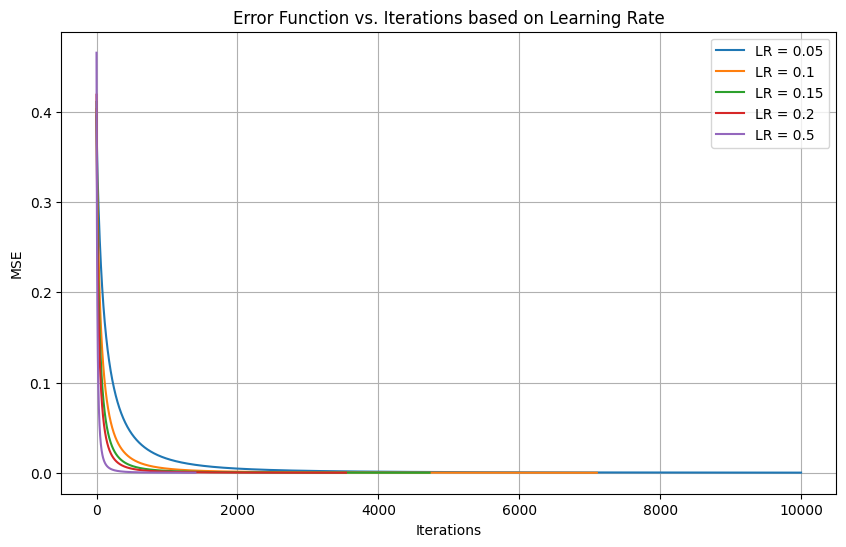

In [53]:
import matplotlib.pyplot as plt

x1 = [-1, 0, 0]
x2 = [-1, 0, 1]
x3 = [-1, 1, 0]
x4 = [-1, 1, 1]

def train(learning_rate, w, terminate_threshold, max_iterations):
    # training loop
    errors = []
    iteration = 1
    terminate = False
    while not terminate:
        # for each training example x from D
        iter_error = 0
        for x in [x1, x2, x3, x4]:  
            # get expected output
            if x == x4: d = 1
            else: d = 0
            
            # calculate neuron's output / args: input(x), weights(w), expected output(d)
            y = neuron(np.array(x), np.array(w), 'sigmoid')
    
            # calculate the error
            error = d-y
            
            # calculate delta w
            delta_w = [learning_rate * error * i for i in x]
            
            # update w using the delta rule
            w = [a + b for a, b in zip(w, delta_w)]
    
            # calculate the squared error for this iteration
            iter_error += error**2
    
        # using mean squared error 
        E = iter_error / 2.0
        errors.append(E)
        if E <= terminate_threshold:
            terminate = True
            print(f"Converged after {iteration} iterations. \nError: {E}")
        elif iteration == max_iterations:
            terminate = True
            print(f"Trained for max number of iterations. \nError: {E}")
        iteration += 1
    return errors

def plot_training(learning_rates, w, terminate_threshold, max_iterations):
    lr_errors = {}
    
    # store errors for each learning rate in lr_errors
    for lr in learning_rates:
        print(f"\nTraining with learning rate {lr}")
        errors = train(lr, w, terminate_threshold, max_iterations)
        lr_errors[lr] = errors
    
    # plot the errors for each learning rate
    plt.figure(figsize=(10, 6))
    
    for lr, errors in lr_errors.items():
        plt.plot(range(len(errors)), errors, label=f'LR = {lr}')
    
    plt.title('Error Function vs. Iterations based on Learning Rate')
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

###### playground ##############################
w = [0.5, 0.2, 0.3] 
terminate_threshold = 0.0001
max_iterations = 10000
learning_rates = [0.05, 0.1, 0.15, 0.2, 0.5]
################################################

plot_training(learning_rates, w, terminate_threshold, max_iterations)

# Exercise 2: Associative memory

## 2.1 Forming the correlation matrix directly

In this part of the exercise we will use the direct approach in forming the correlation matrix. Memory based on the correlation matrix should memorize input-output association pairs represented as vectors. For each input vector (key) the memory has to memorize the output pattern i.e. vector in an ASCII code formulation. In this example we will use 4-dimensional input and output vectors. Words (output vectos) that have to be memorized are: '*vrat*' , '*kraj*' , '*cres*' , '*otac*'. Vectors $b_i$, which represent those words should be formed as follows:

In [157]:
real=lambda x: np.array([[ord(character) for character in x]]).T

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

### 2.1.1 Orthogonal input vectors

This experiment demonstrates how to create an associative memory. Ortonormalized set of vectors defined as below

In [121]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

is used as input vector set (set of keys). We form the memory correlation matrix $\mathbf{M}$ using input output pairs as follows:

In [107]:
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[118 107  99 111]
 [114 114 114 116]
 [ 97  97 101  97]
 [116 106 115  99]]


In order to verify whether the memory is functioning properly, we have to calculate outputs for each input vector. For example, the output for the key $a_1$ can be obtained as follows:

In [122]:
char=lambda x:"".join(map(chr, map(int, list(x))))

word=char(M@a1)
print(word)

vrat


/var/folders/25/5_9qljnj5n11rz1yvbgwxfz40000gn/T/ipykernel_26878/3174014925.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


**Tasks**

For each key, print the key and the corresponding output.
1. Were all input-output pairs memorized correctly? Yes.
2. How many input-output pairs would be memorized if vectors $a_i$ were not normalized?  
It would be memorized fewer amount of pairs than now, when normalized vectors were used. It is because the keys might not isolate each output vector uniquely since there could be certain amount of overlap in between the keys. When using normalized vectors like in the previous example, the vectors are independent of each other and the matrix M can map input-output pairs uniquely.

In [123]:
for a in [a1, a2, a3, a4]:
    word = char(M @ a)
    print(f"Key: {a.T[0]}, Output: {word}")

Key: [1 0 0 0], Output: vrat
Key: [0 1 0 0], Output: kraj
Key: [0 0 1 0], Output: cres
Key: [0 0 0 1], Output: otac


/var/folders/25/5_9qljnj5n11rz1yvbgwxfz40000gn/T/ipykernel_26878/3174014925.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


### 2.1.2 Correlation matrix properties

The goal of this experiment is to demonstrate the capacity of obtained memory. In this part of the exercise we will try to memorize one more (fifth) word ('*mrak*'). In 4-dimensional vector space the maximum number of linearly independent vectors is four. Because of this fact, we pick an arbitrary unit vector as the fifth key, for example:

In [124]:
a5 = (a1 + a3) / np.sqrt(2)
a5

array([[0.70710678],
       [0.        ],
       [0.70710678],
       [0.        ]])

Form vectors $b_5$ ('*mrak*') and $a_5$ as explained and add them into the memory using the following expression:

In [125]:
b5 = real("mrak")
M_five = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T + b5 * a5.T

**Tasks**

Once again, print each key and the corresponding output.
1. Was the new association properly memorized? No. Probably because of the overlap with the old vectors.
2. Did other associations stay correctly memorized?
    - If not - which were not memorized correctly and why?  
      "vrat" and "cres" were not memorized correctly because of the overlap with a5-"mrak", since a5 was created as a combination of a1 and a3 vectors, the keys of the failed associations and M_five has trouble with separating them.  
    - If yes - which were memorized correctly and why?  
        "kraj" and "otac" were memorized correctly since they are less influenced by the newly added vector, their corresponding input vectors have minimal overlap with a5.

In [126]:
for a in [a1, a2, a3, a4, a5]:
    word = char(M_five @ a)
    print(f"Key: {a.T[0]}, Output: {word}")

Key: [1 0 0 0], Output: ÃÂ¥¿
Key: [0 1 0 0], Output: kraj
Key: [0 0 1 0], Output: °Â©¾
Key: [0 0 0 1], Output: otac
Key: [0.70710678 0.         0.70710678 0.        ], Output: ĆēíĎ


/var/folders/25/5_9qljnj5n11rz1yvbgwxfz40000gn/T/ipykernel_26878/3174014925.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


### 2.1.3 Word pairs as associations

In this experiment we will form the associative memory, which memorizes word pairs. The associations, which have to be memorized are: *ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*. Generate input vectors (keys) as follows:

In [158]:
a1 = real("ruka")
a2 = real("kset")
a3 = real("more")
a4 = real("mama")
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[47791 47867 46818 44624]
 [50264 50354 49352 47048]
 [43019 43124 42263 40271]
 [47892 48130 47019 44766]]


**Tasks**

1. What is the response for each input key?  
I got wrong response for each input key, first they were out of Unicode range, so I created a new char function that limits the values (wrong still).
2. Which associations were memorized correctly? None.
3. Which associations were not memorized correctly and why?  
All of them. Since they all were out of the Unicode range, first thought was to check the M matrix, and its values are much bigger then the values from previous Ms. That is a result of multiplication of input and output vectors. When we try to decode the words, the values fall outside the Unicode range. 
4. How can we fix this problem?  
By orthonormalizing input vectors...to have something like in the first examples where the matrix M worked fine.

In [128]:
char = lambda x: "".join(map(lambda v: chr(max(0, min(int(v), 0x10FFFF))), x))

for a in [a1, a2, a3, a4]:
    word = char(M @ a)
    print(f"Key: {a.T[0]}, Output: {word}")

Key: [114 117 107  97], Output: 􏿿􏿿􏿿􏿿
Key: [107 115 101 116], Output: 􏿿􏿿􏿿􏿿
Key: [109 111 114 101], Output: 􏿿􏿿􏿿􏿿
Key: [109  97 109  97], Output: 􏿿􏿿􏿿􏿿


/var/folders/25/5_9qljnj5n11rz1yvbgwxfz40000gn/T/ipykernel_26878/524824418.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char = lambda x: "".join(map(lambda v: chr(max(0, min(int(v), 0x10FFFF))), x))


### 2.1.4 Input vector orthogonalization

In this experiment we show an associative memory, which uses keys that are orthonormalized. We use the Gram-Schmidt orthogonalization method as follows. We first form the matrix $\mathbf{A}$ using vectors $a_i$:

In [159]:
A=np.hstack([a1, a2, a3, a4])

After this step we perform the orthonormalization step:

In [160]:
from scipy.linalg import orth
C=orth(A.T)

We extract individual orthonormal vectors $c_i$:

In [161]:
c1=np.array([C[0]]).T
c2=np.array([C[1]]).T
c3=np.array([C[2]]).T
c4=np.array([C[3]]).T

In the next step we form a new matrix $\mathbf{M}$ using vectors $c_i$ instead of vectors $a_i$ when creating the matrix $\mathbf{M}$.

In [162]:
M = b1 * c1.T + b2 * c2.T + b3 * c3.T + b4 * c4.T

**Tasks**

Verify the responses of matrix $\mathbf{M}$ with vectors $c_i$ as inputs.
1. What is the effect of vector orthonormalization?  
We turned ai input vectors into ci set of vectors which are orthogonal (perpendicular one to another) and normalized (unit length) and the effect is a more accurate matrix M since the overlap is minimized (like in the first examples).
2. How many pairs were correctly memorized?  
All of them were memorized partially. (vrat-kraj-cres-otac) v->u, r->q, a->`, t->s, e->d, o->n  
The outputs are not correct, but with a help of expected outputs it is possible to decode letters.
3. What can we expect when normalizing the vectors?  
Every vector has unit length, but they are not orthogonal so the overlap in the matrix M is still possible and the pairs may not be decoded correctly. But still without normalization longer vectors could dominate the output, or the vectors with similar length can still differ because of their length.
4. What can we expect when only orthogonalizing the vectors?  
Vectors are perpendicular to each other, but they do not have to have a unit length. This reduces overlap, but the vector scaling can affect badly on the retrieving outputs.
5. What can we expect if vectors $c_i$ are linearly independent but not orthogonal?  
That means that no vectors are a combination of some of the other vectors. This way vectors are more distinguishable (in the previous example we had a vector a5 that was a combination of 2 existing vectors and the matrix M didn't work right because of the overlap), but without orthogonality there can still exist some overlap in the matrix (noise).

In [163]:
char=lambda x:"".join(map(chr, map(int, list(x))))

for c in [c1, c2, c3, c4]:
    word = char(M @ c)
    print(f"Key: {c.T[0]}, Output: {word}")

Key: [-0.50594743  0.14847022  0.77925491  0.33872641], Output: uq`s
Key: [-0.50939047 -0.83525837 -0.19795538  0.06065043], Output: kq`j
Key: [-0.50546797  0.25257838 -0.01775974 -0.8248581 ], Output: cqds
Key: [-0.47858195  0.46530012 -0.59435684  0.44854773], Output: nt`c


/var/folders/25/5_9qljnj5n11rz1yvbgwxfz40000gn/T/ipykernel_26878/3200134411.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


### 2.1.5 Finding the correlation matrix using matrix inversion

For previously used word pairs (*ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*) find a $4\times 4$ correlation matrix $\mathbf{M}$ as $\mathbf{M} = \mathbf{B}\mathbf{A}^{-1}$, where matrix $\mathbf{B}$ is defined as:

In [172]:
B=np.hstack([b1, b2, b3, b4])
M=B@np.linalg.inv(A)
M

array([[ 2.61453831, -0.42249469, -1.18860108, -0.03551725],
       [ 0.86259171, -0.29902568,  0.16622243,  0.33881185],
       [ 0.11877619,  0.02550434,  0.55198385,  0.220755  ],
       [-0.34587034,  1.00278743,  0.66319844, -0.33875405]])

**Tasks**

1. Were all associations properly memorized? Remark: The result should be rounded to the nearest number before comparison.  
All associations were memorized properly (*ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*). Input vectors were linearly independent (A is full rank) so A was invertible and M was created as a transformation that perfectly maps each input vector from A to its corresponding output vector from B.

In [177]:
rank_A = np.linalg.matrix_rank(A)
print(f"Rank of A: {rank_A}")

if rank_A == A.shape[0]:  # A.shape[0] = 4 -> rank of A should be 4
    print("Matrix A is full rank and invertible.")
else:
    print("Matrix A is not full rank and it cannot be inverted.")

Rank of A: 4
Matrix A is full rank and invertible.


In [178]:
char=lambda x:"".join(map(chr, map(int, list(x))))

for a in [a1, a2, a3, a4]:
    word = char(np.round(M @ a).astype(int))
    print(f"Key: {char(a.T[0])}, Output: {word}")

Key: ruka, Output: vrat
Key: kset, Output: kraj
Key: more, Output: cres
Key: mama, Output: otac


/var/folders/25/5_9qljnj5n11rz1yvbgwxfz40000gn/T/ipykernel_26878/2387711145.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


### 2.1.6 Finding the correlation matrix using pseudo-inversion

A pseudo-inverse matrix can be used in order to find the correlation matrix when number of associations is larger than dimensionality of vectors representing the associations. In this case, the correlation matrix can be found as $\mathbf{M} = \mathbf{B}\mathbf{A}^{+}$, where $\mathbf{A}^{+}$ is a pseudo-inverse matrix defined as $\mathbf{A}^{+} = \mathbf{A}^{T}(\mathbf{A}\mathbf{A}^{T})^{-1}$.

Assume that the vectors $a_i$ and $b_i$ are defined previously (five associations in total). Find the pseudo-inverse matrix for this case.

In [180]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

a5 = (a1 + a3) / np.sqrt(2)

A=np.hstack([a1, a2, a3, a4, a5])
B=np.hstack([b1, b2, b3, b4, b5])
A_pseudo=A.T@np.linalg.inv(A@A.T)
M=B@A_pseudo

**Tasks**

1. Were all pairs memorized correctly?  
No. Again, a5 was created as a combination of a1 and a3 and those keys were not memorized correctly because of the overlap.
2. If not, what is the error between expected and obtained values? 938.0  
The pseudo-inverse minimizes the squared error but cannot eliminate it entirely when there is more associations than the space in the memory matrix can represent.

In [191]:
errors = []
for i, a in enumerate([a1, a2, a3, a4, a5]):
    expected_output = char(B[:,i])
    obtained_output = char(M @ a)
    print(f"[Key a{i+1}] Expected: {expected_output}, Obtained: {obtained_output}")

    if expected_output == obtained_output:
        print("+ Association memorized correctly.")
    else:
        error = np.sum(np.abs(np.round(M @ a) - B[:,i]))
        errors.append(error)
        print(f"- Association not memorized correctly. Error: {error}")

print(f"\nError from all associations: {sum(errors)}")

[Key a1] Expected: vrat, Obtained: faQ`
- Association not memorized correctly. Error: 282.0
[Key a2] Expected: kraj, Obtained: kraj
+ Association memorized correctly.
[Key a3] Expected: cres, Obtained: SaU_
- Association not memorized correctly. Error: 272.0
[Key a4] Expected: otac, Obtained: otac
+ Association memorized correctly.
[Key a5] Expected: mrak, Obtained: v
- Association not memorized correctly. Error: 384.0

Error from all associations: 938.0


/var/folders/25/5_9qljnj5n11rz1yvbgwxfz40000gn/T/ipykernel_26878/2387711145.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  char=lambda x:"".join(map(chr, map(int, list(x))))


## 2.2 Finding the correlation matrix using supervised learning

This experiment shows us how to form the matrix $\mathbf{M}$ using supervised learning. In two following experiments we will use learning with error correction.

### 2.2.1 Learning with error correction

Form matrices $\mathbf{A}$ and $\mathbf{B}$ where each contains 4 vectors stacked in columns as explained in previous experiments. Check the contents of obtained matrices with following operations:

In [248]:
a1=real("ruka")
a2=real("kset")
a3=real("more")
a4=real("mama")

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

A=np.hstack([a1, a2, a3, a4])
B=np.hstack([b1, b2, b3, b4])
print(A)
print(B)

[[114 107 109 109]
 [117 115 111  97]
 [107 101 114 109]
 [ 97 116 101  97]]
[[118 107  99 111]
 [114 114 114 116]
 [ 97  97 101  97]
 [116 106 115  99]]


In order to start the learning procedure we have to initialize the matrix $\mathbf{M}$ (For example, random values uniformly generated in $[-0.5, 0.5]$ interval):

In [249]:
M=np.random.rand(4, 4)-0.5

For the learning part use the function *trainlms*, which is the implementation of the Widrow-Hoff LMS learning algorithm. The function can be used as follows:

In [250]:
def trainlms(A, B, M, ni, max_num_iter, min_err=0.02):
    d=B
    x=A
    w=M

    n=0
    err=[]
    while (n<max_num_iter):
        n+=1
        e=d-w@x
        w+=ni*np.dot(e, x.T)
        err.append(np.sum(np.sum(np.multiply(e, e))))
        if (err[-1]<min_err):
            break
    return w, err

where *max_num_iter* is the number of iterations and *ni* is the learning rate. Find the *max_num_iter* variable experimentally. For *ni* you can use:

In [251]:
ni=0.9999/np.linalg.eig(A @ A.T)[0].max()

The function trainlms performs the learning until SSE drops below $0.02$ or maximum number of iterations is performed. After the learning phase, look at the responses of the correlation matrix $\mathbf{M}$:

In [252]:
M, e=trainlms(A, B, M, ni, 100000)

If we type

In [253]:
np.round(M@A)==B

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

we will see, which characters were properly reconstructed: the positions with correct reconstructions will have value *True* and  other positions will have value *False*. By calling the *trainlms* multiple times we can extend the learning process and maybe increase the number of memorized characters but the proper way to extend the learning process is to increase the *max_num_iter* variable. We can draw a graph, which plots the error with number of iterations (in logaritmic scale) using the following commands:

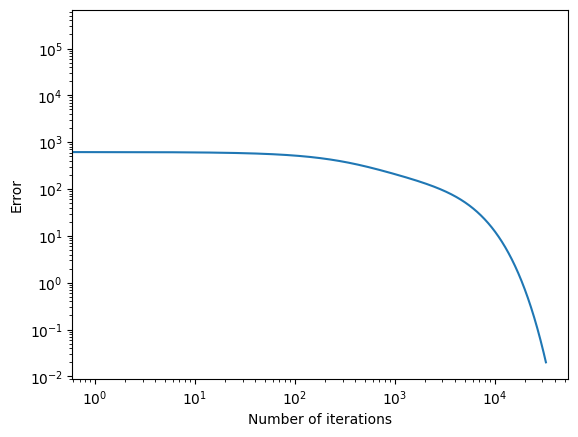

In [216]:
plt.plot(e)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

**Tasks**

1. Plot a graph showing number of memorized characters tied to number of used iterations. (Caution: When building the graph, start the simulation with the same starting matrix.)  
Note: for currently generated M_init, it is interesting to see that 15 characters were memorized in 10100 iterations, but in only one more iteration, we got a complete success.

Iterations: 100, Memorized Characters: 1
Iterations: 1000, Memorized Characters: 2
Iterations: 10000, Memorized Characters: 11
Iterations: 10100, Memorized Characters: 15
Iterations: 10101, Memorized Characters: 16
Iterations: 100000, Memorized Characters: 16


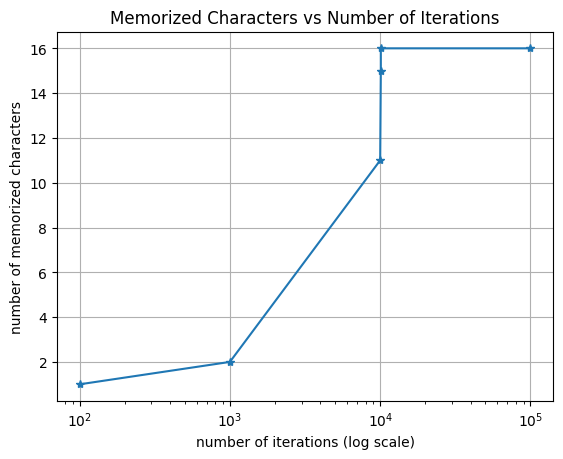

In [233]:
M_init=np.random.rand(4, 4)-0.5

iterations = [100, 1000, 10000, 10100, 10101, 100000]
num_memorized = []

for max_iter in iterations:
    M, e = trainlms(A, B, M_init, ni, max_iter)
    
    isTrue = (np.round(M @ A) == B)
    num_correct = np.sum(isTrue)
    num_memorized.append(num_correct)
    print(f"Iterations: {max_iter}, Memorized Characters: {num_correct}")

# plot the error vs. number of iterations in log-log scale
plt.plot(iterations, num_memorized, marker='*')
plt.xscale("log")
plt.xlabel("number of iterations (log scale)")
plt.ylabel("number of memorized characters")
plt.title("Memorized Characters vs Number of Iterations")
plt.grid(True)
plt.show()

## 2.2.2 Effect of larger number of associations

This experiment demonstrates the capacity of the associative memory. What is the capacity of a $4\times 4$ correlation matrix based associative memory? Expected capacity is around 2 to 4 independent input-output pairs, depending on the orthogonality of the input vectors

**Tasks**
1. For additional pair '*auto*'-'*mrak*' create vectors $a_5$ and $b_5$ as explained in the previous part of the exercise. Create new matrices A and B with dimensions $4$ (rows) $\times$ $5$ (columns) in the same way as previously explained. Initialize the matrix $\mathbf{M}$ with random starting values.

In [262]:
a1=real("ruka")
a2=real("kset")
a3=real("more")
a4=real("mama")
a5=real("auto")

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")
b5=real("mrak")

A=np.hstack([a1, a2, a3, a4, a5])
B=np.hstack([b1, b2, b3, b4, b5])

# initialize the matrix M 
M=np.random.rand(4, 4)-0.5

# Check the matrices
print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)
print("\nInit Matrix M:")
print(M)

Matrix A:
[[114 107 109 109  97]
 [117 115 111  97 117]
 [107 101 114 109 116]
 [ 97 116 101  97 111]]

Matrix B:
[[118 107  99 111 109]
 [114 114 114 116 114]
 [ 97  97 101  97  97]
 [116 106 115  99 107]]

Init Matrix M:
[[ 0.21915662  0.18502723  0.01543417 -0.16492363]
 [-0.49959665 -0.26427111  0.31247306 -0.1036037 ]
 [-0.37924896 -0.43778186 -0.23222136  0.342739  ]
 [ 0.32340412  0.38119267 -0.41830058  0.34634278]]


Use the *trainlms* function in the following way:

In [263]:
ni=0.9999/max(np.linalg.eig(np.dot(A, A.T))[0])
M, e=trainlms(A, B, M, ni, 100000)

2


**Tasks**

1. How many iterations did you use? 100000

In [264]:
print(f"Number of iterations: {len(e)}")

Number of iterations: 100000


2. How many characters were memorized correctly? 2

In [266]:
print(f"Number of characters memorized correctly: {np.sum(np.round(np.dot(M, A))==B)}")

Number of characters memorized correctly: 2


3. What is the SSE error? 219.7984471168544

In [265]:
sse_error = e[-1] 
print(f"SSE error: {sse_error}")

SSE error: 219.79844711685456


4. What happens if we call the function from the beginning? Now we call the same function with already trained matrix for this task, so the result is not that different.

In [267]:
M, e=trainlms(A, B, M, ni, 100000)
print(f"Number of iterations: {len(e)}")
print(f"Number of characters memorized correctly: {np.sum(np.round(np.dot(M, A))==B)}")
sse_error = e[-1] 
print(f"SSE error: {sse_error}")

Number of iterations: 100000
Number of characters memorized correctly: 2
SSE error: 219.79844711685456


5. How many characters are correctly memorized now and how large is the mistake? Is there any difference and why?  
2, as seen from the cell above. The mistake is also quite similar to the previous one, there is no much difference because we provided the matrix that is already trained, it is already "optimal" for this task.

6. Is it possible to train this network in order to memorize all five associations? No


7. Why? (Explain the previous answer)  
The matrix M is a matrix of 4x4 dimensions, and it can represent up to 4 linearly independent transformations in a 4-dimensional space. If we try to add one more association, the vectors become linearly dependent and there might not be a unique solution. Also during training, the algorithm adjusts matrix M to reduce the error iteratively. If we add more associations, the adjustments made to correctly map one pair might introduce errors in others and the network only  minimizes but not eliminates the error.